<a href="https://colab.research.google.com/github/aashikagarg/Delivery-route-optimization-mini-project5/blob/main/algo_efficiency_mini_project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Libraries**

In [1]:
!pip install memory_profiler networkx matplotlib


**Input Modeling**

In [2]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

# Locations
locations = ['Warehouse', 'C1', 'C2', 'C3']

distance_matrix = [
    [0, 4, 8, 6],
    [4, 0, 5, 7],
    [8, 5, 0, 3],
    [6, 7, 3, 0]
]

# Customer data
parcels = {
    'C1': {'value': 50, 'time': (9, 12), 'weight': 10},
    'C2': {'value': 60, 'time': (10, 13), 'weight': 20},
    'C3': {'value': 40, 'time': (11, 14), 'weight': 15}
}

vehicle_capacity = 30
print("Input Loaded Successfully!")


Input Loaded Successfully!


**Recurrence-Based Delivery Cost Function**

In [3]:
def delivery_cost(current, visited, dist):
    if len(visited) == len(dist) - 1:
        return dist[current][0]  # return to warehouse

    min_cost = float('inf')
    for nxt in range(1, len(dist)):
        if nxt not in visited:
            cost = dist[current][nxt] + delivery_cost(nxt, visited + [nxt], dist)
            min_cost = min(min_cost, cost)
    return min_cost

print("Recurrence Function Ready!")


Recurrence Function Ready!


**Greedy Parcel Selection (Value/Weight)**

In [4]:
def greedy_knapsack(parcels, capacity):
    items = []
    for cid, data in parcels.items():
        ratio = data['value'] / data['weight']
        items.append((ratio, cid))

    items.sort(reverse=True)

    selected = []
    total_weight = 0

    for ratio, cid in items:
        if total_weight + parcels[cid]['weight'] <= capacity:
            selected.append(cid)
            total_weight += parcels[cid]['weight']

    return selected

selected_parcels = greedy_knapsack(parcels, vehicle_capacity)
print("Greedy Selected Parcels:", selected_parcels)


Greedy Selected Parcels: ['C1', 'C2']


**DP for Time-Window Feasibility**

In [5]:
def check_time_window(path, parcels, dist):
    time = 9  # vehicle start time (9 AM)
    for i in range(len(path)):
        if i > 0:
            time += dist[path[i-1]][path[i]]

        customer = locations[path[i]]
        if customer != 'Warehouse':
            low, high = parcels[customer]['time']
            if not (low <= time <= high):
                return False
    return True

print("DP Time Window Checker Ready!")


DP Time Window Checker Ready!


**Shortest Path Using Dijkstra**

In [6]:
import heapq

def dijkstra(graph, src):
    n = len(graph)
    dist = [float('inf')] * n
    dist[src] = 0
    pq = [(0, src)]
    while pq:
        cost, u = heapq.heappop(pq)
        if cost > dist[u]: continue
        for v in range(n):
            if graph[u][v] > 0:
                new_cost = cost + graph[u][v]
                if new_cost < dist[v]:
                    dist[v] = new_cost
                    heapq.heappush(pq, (new_cost, v))
    return dist

print("Dijkstra Ready!")


Dijkstra Ready!


**Minimum Spanning Tree (Prim’s Algorithm)**

In [7]:
def prim_mst(graph):
    n = len(graph)
    visited = [False]*n
    mst_cost = 0
    visited[0] = True

    for _ in range(n-1):
        min_edge = float('inf')
        u = v = -1

        for i in range(n):
            if visited[i]:
                for j in range(n):
                    if not visited[j] and 0 < graph[i][j] < min_edge:
                        min_edge = graph[i][j]
                        u, v = i, j

        visited[v] = True
        mst_cost += min_edge

    return mst_cost

mst_cost = prim_mst(distance_matrix)
print("MST Cost:", mst_cost)


MST Cost: 12


**TSP Brute Force**

In [8]:
from itertools import permutations

def tsp_bruteforce(locations, dist):
    n = len(locations)
    nodes = list(range(1, n))

    best_cost = float('inf')
    best_route = None

    for perm in permutations(nodes):
        cost = dist[0][perm[0]]
        for i in range(len(perm)-1):
            cost += dist[perm[i]][perm[i+1]]
        cost += dist[perm[-1]][0]

        if cost < best_cost:
            best_cost = cost
            best_route = [0] + list(perm) + [0]

    return best_route, best_cost

route, cost = tsp_bruteforce(locations, distance_matrix)
print("TSP Route:", [locations[i] for i in route])
print("TSP Cost:", cost)


TSP Route: ['Warehouse', 'C1', 'C2', 'C3', 'Warehouse']
TSP Cost: 18


**Network Graph Visualization**

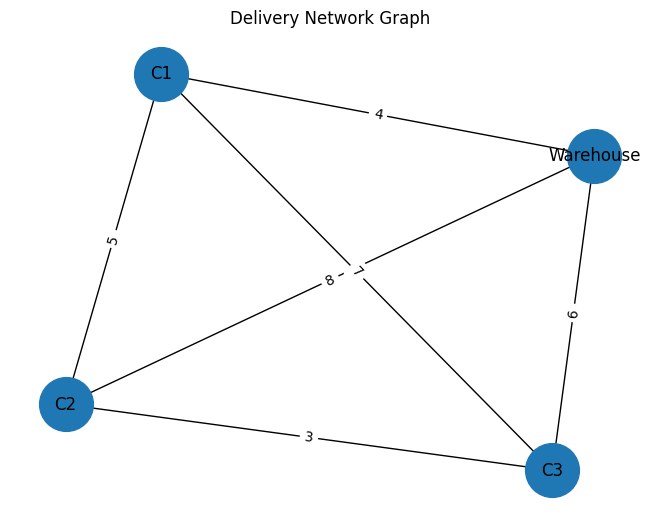

In [9]:
G = nx.Graph()

for i in range(len(locations)):
    for j in range(i+1, len(locations)):
        G.add_edge(locations[i], locations[j], weight=distance_matrix[i][j])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1500, font_size=12)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Delivery Network Graph")
plt.show()


**Profiling TSP Growth**

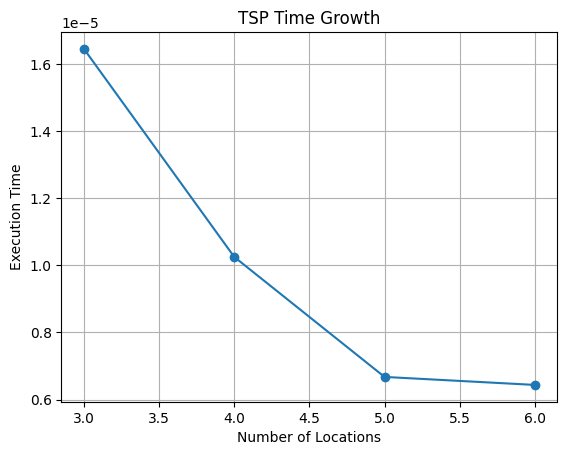

In [10]:
import time

times = []
sizes = [3,4,5,6]

for n in sizes:
    sub_locs = locations[:n]
    sub_dist = [row[:n] for row in distance_matrix[:n]]

    start = time.time()
    tsp_bruteforce(sub_locs, sub_dist)
    end = time.time()

    times.append(end - start)

plt.plot(sizes, times, marker='o')
plt.title("TSP Time Growth")
plt.xlabel("Number of Locations")
plt.ylabel("Execution Time")
plt.grid(True)
plt.show()


**Final Summary Output**

In [11]:
print("===== Final Summary =====")
print("Greedy Selected:", selected_parcels)
print("MST Cost:", mst_cost)
print("TSP Route:", [locations[i] for i in route])
print("TSP Cost:", cost)
print("Shortest Distances from Warehouse:", dijkstra(distance_matrix, 0))
print("==========================")


===== Final Summary =====
Greedy Selected: ['C1', 'C2']
MST Cost: 12
TSP Route: ['Warehouse', 'C1', 'C2', 'C3', 'Warehouse']
TSP Cost: 18
Shortest Distances from Warehouse: [0, 4, 8, 6]
